In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import time, sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/content/drive/MyDrive/MasterDataset/Backorder/Backorder_Training_Dataset.csv")
test = pd.read_csv("/content/drive/MyDrive/MasterDataset/Backorder/Backorder_Test_Dataset.csv")

In [3]:
finaltest = pd.read_csv("/content/drive/MyDrive/MasterDataset/Backorder/AutoencoderTest.csv")

In [4]:
#Preview Data
print("Train Data :",train.shape)
print("Test Data :",test.shape)

Train Data : (1687861, 23)
Test Data : (242076, 23)


In [5]:
train.drop(columns='sku', inplace=True)
test.drop(columns='sku', inplace=True)


In [6]:
train.drop(index=train.shape[0]-1, axis=0, inplace=True)
test.drop(index=test.shape[0]-1, axis=0, inplace=True)

In [7]:
 train['lead_time'] = SimpleImputer(strategy="mean").fit_transform(train['lead_time'].values.reshape(-1, 1))
 test['lead_time'] = SimpleImputer(strategy="mean").fit_transform(test['lead_time'].values.reshape(-1, 1))

In [8]:
train['perf_12_month_avg']=train['perf_12_month_avg'].replace(-99, np.nan)
train['perf_6_month_avg']=train['perf_6_month_avg'].replace(-99, np.nan)
train['perf_12_month_avg'] = train['perf_12_month_avg'].fillna(train.perf_12_month_avg.median())
train['perf_6_month_avg'] = train['perf_6_month_avg'].fillna(train.perf_6_month_avg.median())


test['perf_12_month_avg']=test['perf_12_month_avg'].replace(-99, np.nan)
test['perf_6_month_avg']=test['perf_6_month_avg'].replace(-99, np.nan)
test['perf_12_month_avg'] = test['perf_12_month_avg'].fillna(test.perf_12_month_avg.median())
test['perf_6_month_avg'] = test['perf_6_month_avg'].fillna(test.perf_6_month_avg.median())

In [9]:
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    train[col]=pd.factorize(train[col])[0]

In [10]:
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    test[col]=pd.factorize(test[col])[0]

In [11]:
X_test = test.drop(columns=['went_on_backorder'], axis=1)
y_test = test.went_on_backorder


In [12]:
train.isnull().values.sum()

0

In [13]:
train.shape

(1687860, 22)

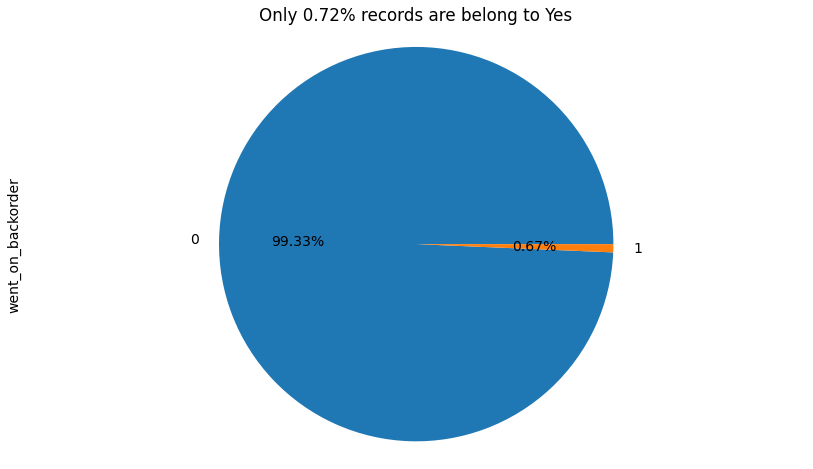

 Target Result 
 0    1676567
1      11293
Name: went_on_backorder, dtype: int64 




In [14]:
# Plot

plt.figure(figsize=(14,8))
plt.rc('font', size=14)          # controls default text sizes
train['went_on_backorder'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("Only 0.72% records are belong to Yes")
plt.show()
print(" Target Result \n",train['went_on_backorder'].value_counts(),"\n\n")

In [15]:
### install h20 framework
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 47 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=4004b056d509b5cd1019dccf984437565b6aefa380ffb1c7375e820f11d159d1
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [16]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [17]:
## Initialise the thread
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq1nhx5ik
  JVM stdout: /tmp/tmpq1nhx5ik/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpq1nhx5ik/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,21 hours and 30 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_ikp9zc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [18]:
train_hf = h2o.H2OFrame(train)
test_hf = h2o.H2OFrame(test) 

# For binary classification, response should be a factor
train_hf['went_on_backorder'] = train_hf['went_on_backorder'].asfactor()
test_hf['went_on_backorder'] = test_hf['went_on_backorder'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
train_hf.head()

national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,7.87227,0,0,0,0,0,0,0,0,0,0,0,0.85,0.83,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0.99,0.99,0,0,0,0,0,0,0
2,7.87227,0,0,0,0,0,0,0,0,0,0,0,0.85,0.83,0,1,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,1,0,0,0.1,0.13,0,0,0,0,0,0,0
8,7.87227,0,0,0,0,0,0,0,4,2,0,0,0.85,0.83,0,1,0,0,0,0,0
13,8,0,0,0,0,0,0,0,0,0,0,0,0.82,0.87,0,0,0,0,0,0,0
1095,7.87227,0,0,0,0,0,0,0,0,4,0,0,0.85,0.83,0,1,0,0,0,0,0
6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
140,7.87227,0,15,114,152,0,0,0,0,0,0,0,0.85,0.83,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,0,0.82,0.87,0,0,0,0,0,0,0


In [20]:
train_hf.shape

(1687860, 22)

In [21]:
test_hf.shape

(242075, 22)

In [22]:
## Split Dataset - Target is true (all backorder ) as 'test' and non backorder as 'train'  

X_test_en  = train_hf[train_hf['went_on_backorder'] == '1']
X_train_en = train_hf[train_hf['went_on_backorder'] == '0']

In [23]:
X_test_en.shape
X_train_en.shape
X= list(range(0,22))
#X= list(range(0,11))

In [24]:
#hiddenOpt = [[50,50],[100,100], [5,5,5],[50,50,50]]
#l2Opt = [1e-4,1e-2]
#hyperParameters = {"hidden":hiddenOpt, "l2":l2Opt}
#bestModel=tuneAndTrain(hyperParameters,H2OAutoEncoderEstimator(activation="Tanh", ignore_const_cols=False, epochs=200),dataFrameTrainPreprocessed)

In [25]:
### Auto Encoder Model
model = H2OAutoEncoderEstimator( activation="Tanh",
                                          hidden=[50,20,5,20,50],
                                          #hidden=[150],
                                          ignore_const_cols = False,
                                          stopping_metric='mse', 
                                          stopping_tolerance=0.00001,
                                          epochs=200)


model.train(x =X, training_frame = X_train_en)


print("MSE = ",model.mse())

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
MSE =  4.067555073947177e-05


In [26]:
MSE =  1.539292180869766e-05

In [27]:
## Anomaly Detection

In [28]:
#model.download_mojo(path="model/",get_genmodel_jar=True)

In [29]:
train_rec_error = model.anomaly(X_train_en)
test_rec_error = model.anomaly(X_test_en)

train_rec_error = train_rec_error.as_data_frame()
train_rec_error['id'] = train_rec_error.index.values + 1
train_rec_error['went_on_backorder'] = 0

count_train_records = len(train_rec_error) 
test_rec_error = test_rec_error.as_data_frame()
test_rec_error['id'] = test_rec_error.index.values + count_train_records + 1
test_rec_error['went_on_backorder'] = 1

rec_error = pd.concat([train_rec_error,test_rec_error], axis = 'index')



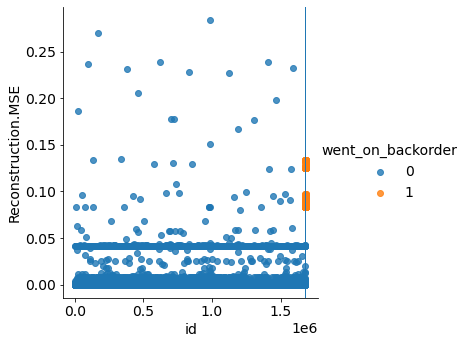

In [30]:
# Plot the Scatter graph

sns.lmplot('id', 'Reconstruction.MSE', hue='went_on_backorder', data=rec_error, fit_reg=False);
plt.axvline(x=count_train_records,linewidth=1)
plt.show()


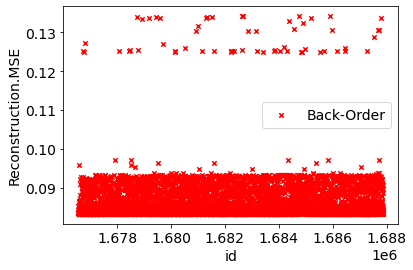

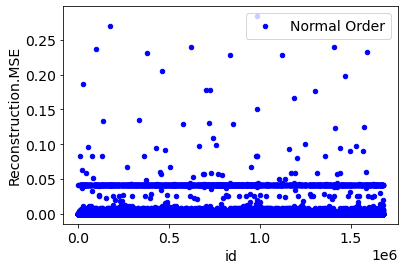

In [31]:

rec_error[rec_error['went_on_backorder'] == 1].plot(kind='scatter', x='id', y='Reconstruction.MSE',c='red',marker='x', label='Back-Order')
rec_error[rec_error['went_on_backorder'] == 0].plot(kind='scatter', x='id', y='Reconstruction.MSE',c='blue',marker='o', label='Normal Order')
plt.legend(loc='upper right')
plt.show()

In [32]:
rec_error_hf = model.anomaly(test_hf)
rec_error_hf['actual'] = test_hf['went_on_backorder']
rec_error_hf = rec_error_hf.as_data_frame()
rec_error_hf['id'] = rec_error_hf.index.values
rec_error_hf['predict'] = 0

#predict = [1 if e > threshold else 0 for e in rec_error_fh.reconstruction_error.values]

rec_error_hf['predict'][(rec_error_hf['Reconstruction.MSE']>0.08) & (rec_error_hf['Reconstruction.MSE'] <0.12)] = 1


df_confusion = pd.crosstab(rec_error_hf['actual'], rec_error_hf['predict'], rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)
print("---"*25)
print("\n % \n")
print(pd.crosstab(rec_error_hf['actual'], rec_error_hf['predict'], rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum()))

Predicted       0     1     All
Actual                         
0          239383     4  239387
1               8  2680    2688
All        239391  2684  242075
---------------------------------------------------------------------------

 % 

Predicted          0          1
True                           
0          99.996658   0.149031
1           0.003342  99.850969


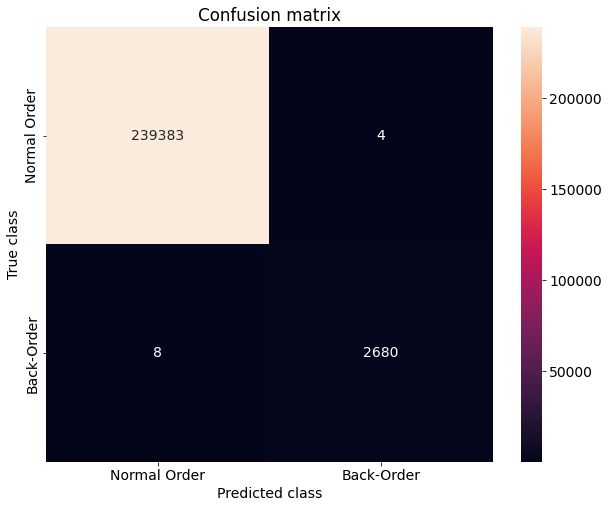

In [33]:
from sklearn.metrics import confusion_matrix

LABELS = LABELS = ['Normal Order', 'Back-Order']
conf_matrix = confusion_matrix(rec_error_hf['actual'], rec_error_hf['predict'])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [34]:
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='cyan' ,label='%s AUC = %0.3f'% (method, roc_auc))
    plt.legend(loc = 'upper left')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

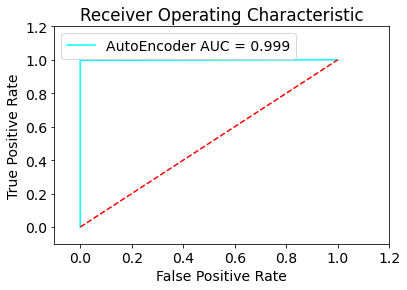

In [35]:
roc_curve_acc(rec_error_hf['actual'], rec_error_hf['predict'], 'AutoEncoder')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(rec_error_hf['actual'], rec_error_hf['predict']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    239387
           1       1.00      1.00      1.00      2688

    accuracy                           1.00    242075
   macro avg       1.00      1.00      1.00    242075
weighted avg       1.00      1.00      1.00    242075



In [37]:
  model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,perf_12_month_avg,1.000000,1.000000,0.114434
1,lead_time,0.959869,0.959869,0.109842
2,perf_6_month_avg,0.942509,0.942509,0.107856
3,ppap_risk,0.602377,0.602377,0.068933
4,deck_risk,0.502819,0.502819,0.057540
5,stop_auto_buy,0.498933,0.498933,0.057095
6,went_on_backorder.0,0.365238,0.365238,0.041796
7,went_on_backorder.1,0.283641,0.283641,0.032458
8,sales_9_month,0.266669,0.266669,0.030516
9,pieces_past_due,0.266437,0.266437,0.030490


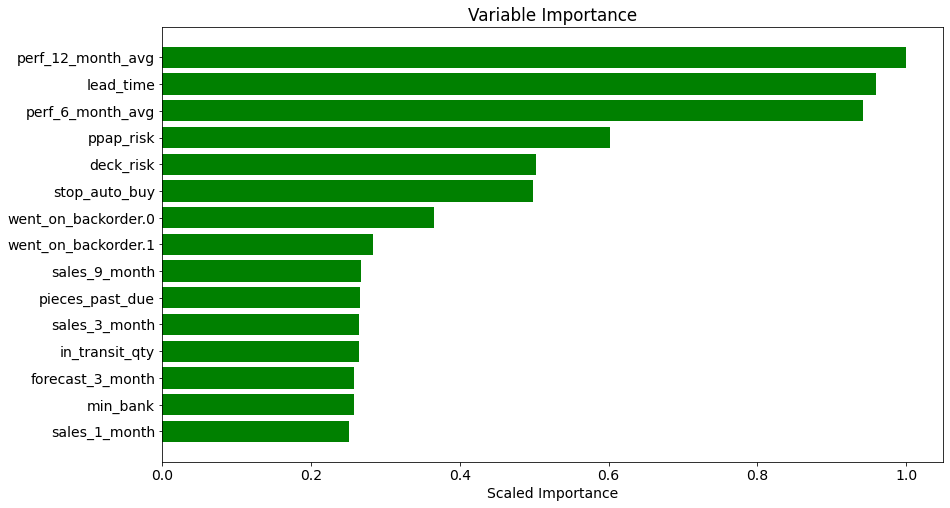

In [38]:
 # plotting the variable importance
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5, 0, 'epoch')

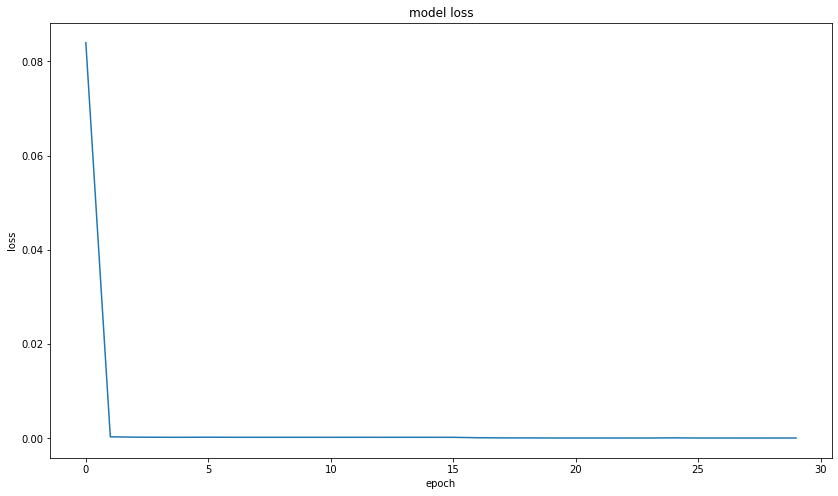

In [39]:
    # plotting the loss
    scoring_history = model.score_history()
    %matplotlib inline
    rcParams['figure.figsize'] = 14, 8
    plt.plot(scoring_history['training_mse'])
    #plt.plot(scoring_history['validation_mse'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

In [42]:
X_test.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,62.0,7.923018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.85,0.83,0.0,0,0,0,0,0
1,9.0,7.923018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.85,0.83,0.0,1,0,1,1,0
2,17.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.92,0.95,0.0,1,0,0,0,0
3,9.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0.0,0.78,0.75,0.0,1,0,1,0,0
4,2.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.54,0.71,0.0,1,0,0,0,0


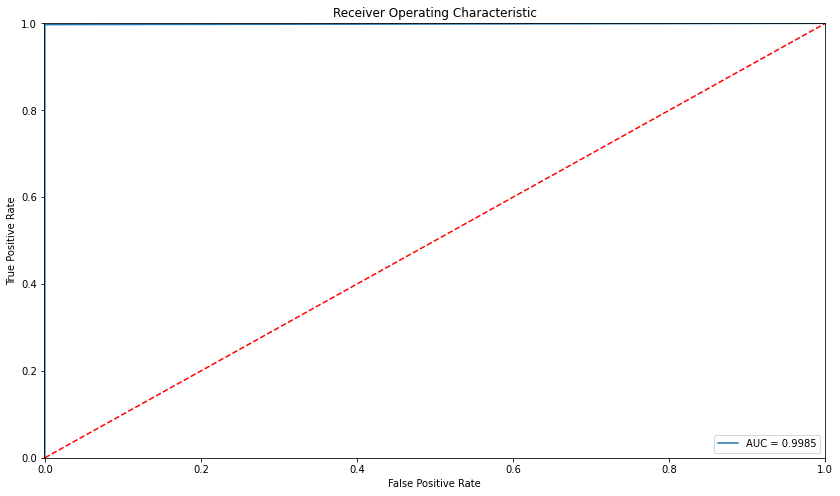

In [44]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                                 roc_curve, recall_score, classification_report, f1_score,
                                 precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(rec_error_hf['actual'], rec_error_hf['predict'])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

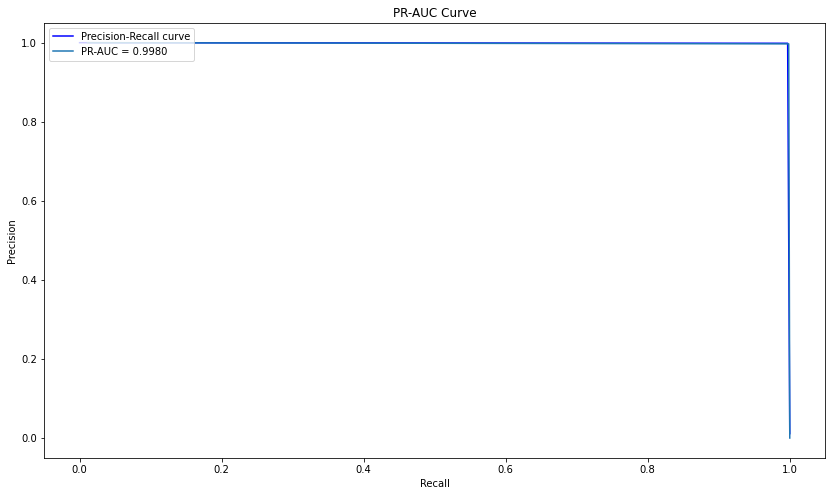

In [45]:
    from sklearn.metrics import precision_recall_curve, auc
    precision, recall, th = precision_recall_curve(rec_error_hf['actual'], rec_error_hf['predict'])
    plt.plot(recall, precision, 'b', label='Precision-Recall curve')
    pr_re = round(auc(recall, precision),3)
    plt.plot(precision, recall, label='PR-AUC = %0.4f'% pr_re)
    plt.legend(loc='upper left')
    plt.title('PR-AUC Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [46]:
########## final Test######

In [47]:
finaltest.drop(columns='sku', inplace=True)
finaltest['perf_12_month_avg']=finaltest['perf_12_month_avg'].replace(-99, np.nan)
finaltest['perf_6_month_avg']=finaltest['perf_6_month_avg'].replace(-99, np.nan)

finaltest['perf_12_month_avg'] = finaltest['perf_12_month_avg'].fillna(test.perf_12_month_avg.median())
finaltest['perf_6_month_avg'] = finaltest['perf_6_month_avg'].fillna(test.perf_6_month_avg.median())

for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    finaltest[col]=pd.factorize(finaltest[col])[0]



In [48]:
finaltest.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,17,8,0,0,0,0,0,0,0,0,...,0,0.92,0.95,0,0,0,0,0,0,0
1,9,2,0,0,0,0,0,0,0,2,...,0,0.78,0.75,0,0,0,1,0,0,0
2,0,2,0,4,7,7,0,0,0,0,...,0,0.70,0.73,0,0,0,0,0,0,1
3,2,2,0,72,144,216,42,56,65,80,...,0,0.99,0.98,0,1,0,0,0,0,1
4,0,2,0,24,36,48,5,14,22,31,...,12,0.13,0.17,0,0,0,0,0,0,1


In [49]:
## Final test
fintest_hf = h2o.H2OFrame(finaltest) 

# For binary classification, response should be a factor
fintest_hf['went_on_backorder'] = fintest_hf['went_on_backorder'].asfactor()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
fin_error_hf = model.anomaly(fintest_hf)
fin_error_hf['actual'] = fintest_hf['went_on_backorder']
fin_error_hf = fin_error_hf.as_data_frame()
fin_error_hf['id'] = fin_error_hf.index.values
fin_error_hf['predict'] = 0

#predict = [1 if e > threshold else 0 for e in rec_error_fh.reconstruction_error.values]

fin_error_hf['predict'][(fin_error_hf['Reconstruction.MSE']>0.08) & (fin_error_hf['Reconstruction.MSE'] <0.12)] = 1

df_confusion = pd.crosstab(fin_error_hf['actual'], fin_error_hf['predict'], rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)
print("---"*25)
print("\n % \n")
print(pd.crosstab(fin_error_hf['actual'], fin_error_hf['predict'], rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum()))


Predicted   0   1  All
Actual                
0          11   0   11
1           0  19   19
All        11  19   30
---------------------------------------------------------------------------

 % 

Predicted      0      1
True                   
0          100.0    0.0
1            0.0  100.0


In [51]:
list(fin_error_hf['predict'])

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0]